# Loan Data Preprocessing

## Table of Contents
1. [Importing Libraries and Dataset](#import)
2. [Handling Missing Data](#missing)
3. [Visualizing Data](#visualize) 
4. [Handling Categorical Data](#category)
5. [Saving Preprocessed Data](#pre)


## 1. Importing Libraries and Dataset
<a id='import'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import suptitle
from seaborn import despine
from sklearn.preprocessing import LabelEncoder

 <br><br>
 -  Reading CSV File.

In [2]:
dataset = pd.read_csv("lendingdata.csv",index_col=0)

In [3]:
dataset

,activity,borrower_genders,country,country_code,currency_policy,distribution_model,lender_count,loan_amount,original_language,repayment_interval,sector,status,term_in_months,rMPI
0,Home Appliances,group,Cambodia,KH,shared,field_partner,5.0,125.0,English,monthly,Personal Use,funded,8,0.097
1,Cereals,female,Philippines,PH,shared,field_partner,5.0,125.0,English,irregular,Food,funded,14,0.055
2,Clothing Sales,female,Peru,PE,shared,field_partner,10.0,375.0,Spanish,monthly,Clothing,funded,8,0.000
3,Clothing Sales,female,Tajikistan,TJ,not shared,field_partner,27.0,850.0,English,monthly,Clothing,funded,14,0.021
4,Fish Selling,female,Uganda,UG,not shared,field_partner,17.0,550.0,English,irregular,Food,funded,9,0.417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27531,Services,female,Zambia,ZM,shared,field_partner,85.0,2300.0,English,bullet,Services,funded,9,0.158
27532,Pigs,female,Philippines,PH,not shared,field_partner,17.0,475.0,English,irregular,Agriculture,funded,8,0.422
27533,General Store,female,Philippines,PH,shared,field_partner,38.0,1075.0,English,irregular,Retail,funded,11,0.055
27534,Food Market,female,Ghana,GH,shared,field_partner,35.0,1075.0,English,irregular,Food,funded,6,0.122


 <br><br>
 -  Proportion of Loans (Funded/Not Funded).

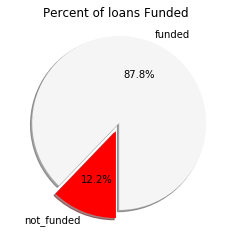

In [4]:
labels=dataset['status'].value_counts(sort = True).index  
sizes = dataset['status'].value_counts(sort = True)
colors = ["whitesmoke","red"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of loans Funded')
plt.show()

 
 -  Information On Dataset.

In [5]:
dataset.count()

activity              27535
borrower_genders      27532
country               27534
country_code          27534
currency_policy       27535
distribution_model    27535
lender_count          27534
loan_amount           27535
original_language     27533
repayment_interval    27535
sector                27536
status                27536
term_in_months        27536
rMPI                  27536
dtype: int64

In [6]:
dataset.nunique()

activity              150
borrower_genders        3
country                61
country_code           61
currency_policy         2
distribution_model      1
lender_count          217
loan_amount           292
original_language       8
repayment_interval      3
sector                 15
status                  2
term_in_months         80
rMPI                  172
dtype: int64

In [7]:
dataset.dtypes

activity               object
borrower_genders       object
country                object
country_code           object
currency_policy        object
distribution_model     object
lender_count          float64
loan_amount           float64
original_language      object
repayment_interval     object
sector                 object
status                 object
term_in_months         object
rMPI                  float64
dtype: object

## 2. Handling missing data
<a id='missing'></a>

 -  Get Total missing attributes.

In [8]:
dataset.isnull().sum().values.sum()

18

 - There are total __18__ missing attributes in the dataset.
 <br><br>
 - Finding missing country data to get their country codes if possible.
 - We can generate __country country names__ with the help of the __country_code__ and vice versa by querying the dataset. 

In [9]:
nulls = pd.isnull(dataset['country'])
dataset[nulls]

,activity,borrower_genders,country,country_code,currency_policy,distribution_model,lender_count,loan_amount,original_language,repayment_interval,sector,status,term_in_months,rMPI
27472,Farming,female,NaN,PH,not shared,field_partner,9.0,225.0,English,monthly,Agriculture,funded,7,0.09
27516,Retail,group,NaN,PE,shared,field_partner,2.0,3225.0,Spanish,irregular,Retail,funded,6,0.00


In [10]:
nulls = pd.isnull(dataset['country_code'])
dataset[nulls]

,activity,borrower_genders,country,country_code,currency_policy,distribution_model,lender_count,loan_amount,original_language,repayment_interval,sector,status,term_in_months,rMPI
87,Poultry,female,Kenya,NaN,shared,field_partner,21.0,900.0,English,monthly,Agriculture,funded,14,0.509
9070,Food Production/Sales,female,Peru,NaN,not shared,field_partner,19.0,550.0,Spanish,monthly,Food,funded,8,0.071


 <br><br>
 - Finding the value of the __missing country code__ by searching in the data using their __country names__.

In [11]:
print(dataset[dataset['country']=='Kenya']['country_code'])
print(dataset[dataset['country']=='Peru']['country_code'])

29       KE
32       KE
51       KE
59       KE
80       KE
         ..
27498    KE
27504    KE
27509    KE
27511    KE
27513    KE
Name: country_code, Length: 2603, dtype: object
2        PE
39       PE
45       PE
86       PE
97       PE
         ..
27461    PE
27501    PE
27518    PE
27529    PE
27530    PE
Name: country_code, Length: 1811, dtype: object


 <br><br>
 - Finding __missing country names__ by querying the dataset using their __country codes__.

In [12]:
print(dataset[dataset['country_code']=='PH']['country'])
print(dataset[dataset['country_code']=='PE']['country'])

1        Philippines
13       Philippines
22       Philippines
28       Philippines
30       Philippines
            ...     
27517    Philippines
27521    Philippines
27522    Philippines
27532    Philippines
27533    Philippines
Name: country, Length: 4838, dtype: object
2        Peru
39       Peru
45       Peru
86       Peru
97       Peru
         ... 
27501    Peru
27516     NaN
27518    Peru
27529    Peru
27530    Peru
Name: country, Length: 1811, dtype: object


 <br><br>
 - Filling the missing values in __country__ and __country_code__ columns.

In [13]:
dataset.loc[(dataset.country=='Kenya'),'country_code']='KE'
dataset.loc[(dataset.country=='Peru'),'country_code']='PE'
dataset.loc[(dataset.country_code=='PH'),'country']='Philippines'
dataset.loc[(dataset.country_code=='PE'),'country']='Peru'


 - Using __Average__ of all __loan amounts__ to fill the missing __loan amounts__.

In [14]:
dataset['loan_amount'].fillna((dataset['loan_amount'].mean()),inplace=True)

 
 - Filling rest of the missing values by finding the __most frequent element__ in their columns respectively.

In [15]:
dataset=dataset.fillna(dataset.mode().iloc[0])

In [16]:
dataset.isnull().sum().values.sum()

0


- Check the __'term_in_months'__ column which __should be numeric__ but is of the type __'object'__ for __inconsistencies__.<br><br> 
- The numbers are inputed as __strings__ and some entries contain values as __'1 Year'__ and __'2 Years'__ instead of being in months.

In [17]:
dataset['term_in_months'].unique()

array(['8', '14', '9', '15', '6', '20', '19', '7', '17', '4', '1 Year',
       '13', '11', '21', '50', '59', '26', '60', '10', '18', '29', '5',
       '25', '27', '23', '39', '22', '38', '62', '28', '48', '16', '37',
       '74', '86', '2 Years', '63', '43', '36', '73', '67', '33', '32',
       '75', '51', '3', '68', '92', '87', '97', '30', '90', '83', '122',
       '130', '49', '84', '72', '71', '44', '45', '40', '31', '2', '35',
       '47', '61', '34', '85', '65', '142', '80', '76', '41', '145',
       '112', '101', '77', '121', '135'], dtype=object)

 - Replace __'1 Year'__ with __12__ and __'2 Years'__ with __24__.

In [18]:
dataset['term_in_months']=dataset['term_in_months'].replace(to_replace='1 Year',value=12)

In [19]:
dataset['term_in_months']=dataset['term_in_months'].replace(to_replace='2 Years',value=24)

 - Convert column to __numeric datatype__.

In [20]:
dataset['term_in_months'] = dataset['term_in_months'].astype(float) 

 - We can either drop the __'country'__ column or the __'country_code'__ column as both represent the same data making our data set redundant and incresing it's dimensionality. Drop any one of these columns. <br> <br>
 - The column __'distribution_model'__ has only __one value__ for all entires in the dataset. It means that this won't affect our classification output or the dependant variable. Hence, drop this column.

In [21]:
dataset.drop('country_code',axis=1,inplace=True)
dataset.drop('distribution_model',axis=1,inplace=True)

## 3. Data Visualizaton
<a id='visualize'></a>
Basic Data Visualizations

### 3.1 Gender Data
<a id='Gender'></a>

 - __Bar plot and Category Plot__

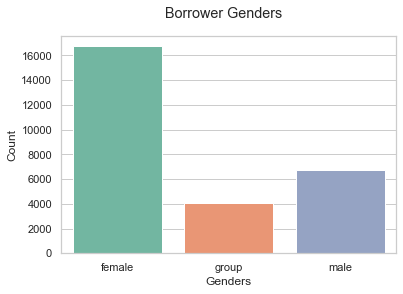

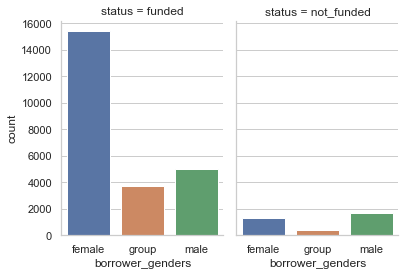

In [22]:
gender_labels =dataset.borrower_genders.values
gender_labels_unique = list(set(gender_labels))
sns.set(style="whitegrid")
ax=sns.countplot(x='borrower_genders',
                 palette="Set2", 
                 data=dataset,
                 order=gender_labels_unique)
ax.set_xticklabels(gender_labels_unique) 
ax.set_ylabel("Count")
ax.set_xlabel("Genders")
suptitle("Borrower Genders")
g = sns.catplot(x="borrower_genders", col="status",
                data=dataset, kind="count",
                height=4, aspect=.7,
                order=gender_labels_unique)
g.set_xticklabels(gender_labels_unique) 
despine()

In [23]:
print(dataset.groupby(['borrower_genders','status']).size().reset_index(name="count"))

  borrower_genders      status  count
0           female      funded  15435
1           female  not_funded   1312
2            group      funded   3703
3            group  not_funded    379
4             male      funded   5044
5             male  not_funded   1663



### 3.2 Country Data

 - __Bar Plot__

<Figure size 1440x720 with 0 Axes>

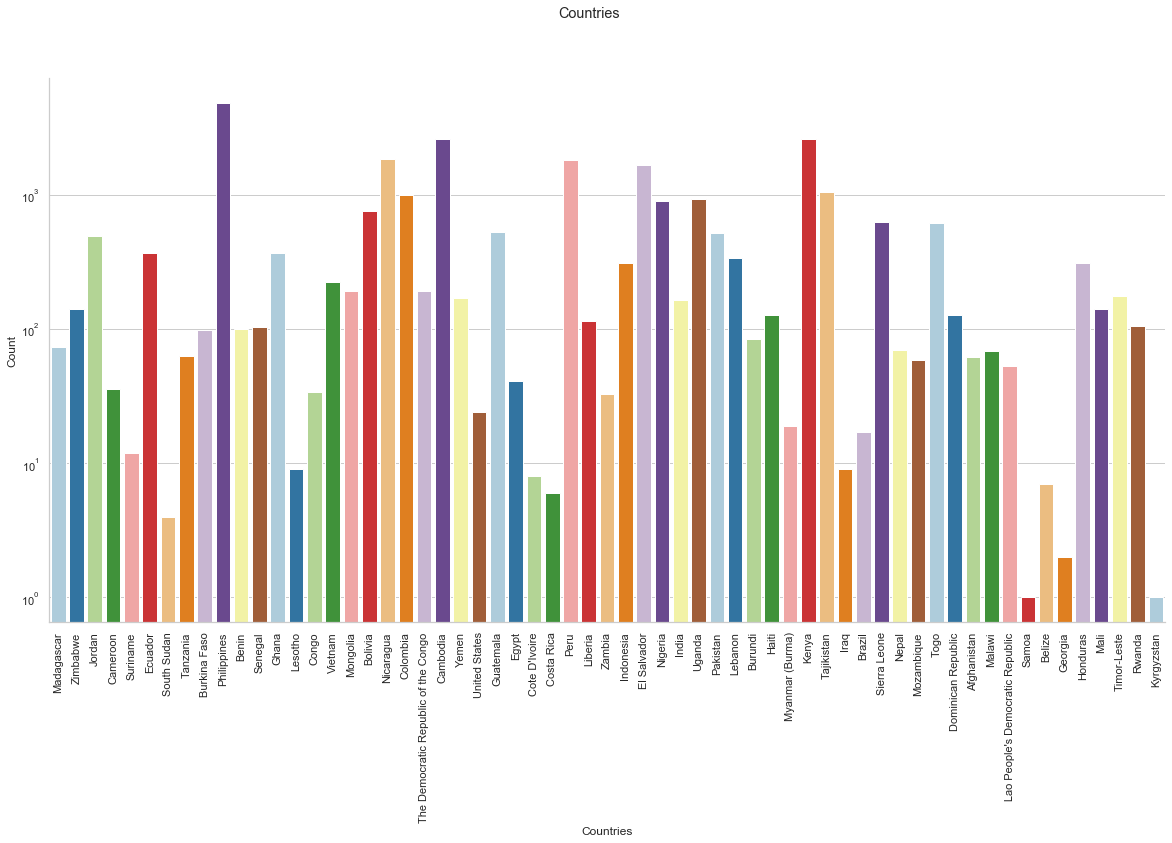

In [24]:
country_labels = dataset.country.values
country_labels_unique = list(set(country_labels))
fig = plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax=sns.countplot(x='country',
                 palette="Paired", 
                 data=dataset,
                 order=country_labels_unique)
ax.set_xticklabels(country_labels_unique,rotation=90) 
ax.set_ylabel("Count")
ax.set_xlabel("Countries")
suptitle("Countries")
ax.set_yscale("log")
despine()

### 3.3 Language Data

 - __Bar plot and Category Plot__

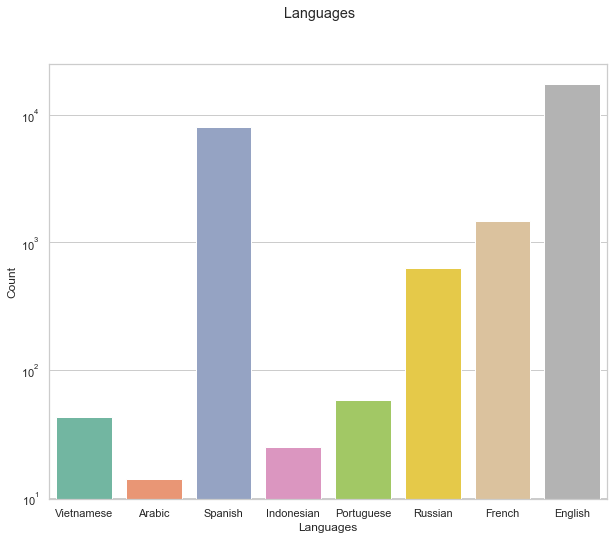

<Figure size 1440x720 with 0 Axes>

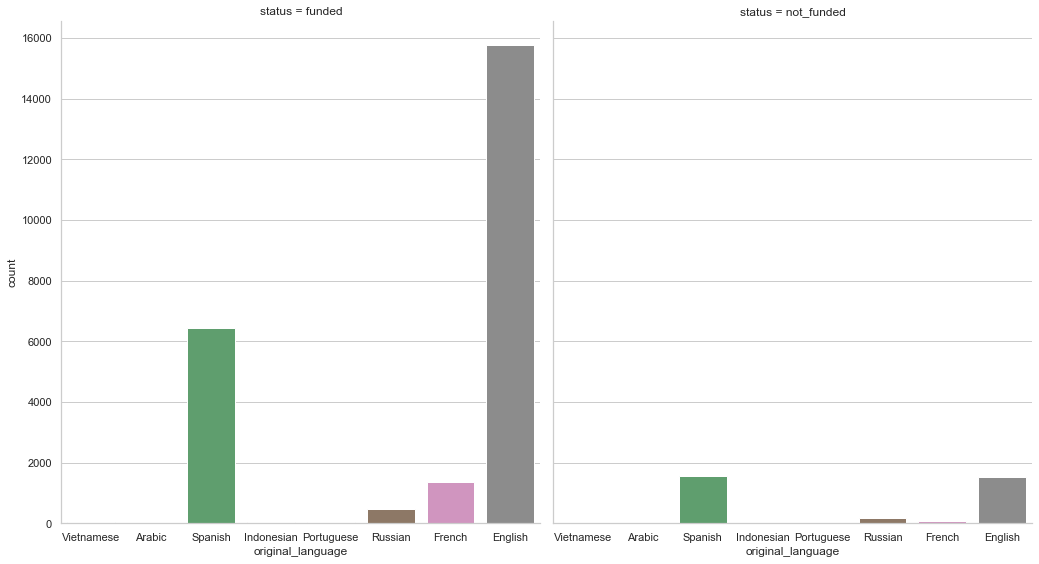

In [25]:
language_labels = dataset.original_language.values
language_labels_unique = list(set(language_labels))
fig = plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax=sns.barplot(x=dataset.original_language.value_counts().index,
               y=dataset.original_language.value_counts(),
               palette="Set2", 
               data=dataset,
               order=language_labels_unique)
ax.set_xticklabels(language_labels_unique) 
ax.set_ylabel("Count")
ax.set_xlabel("Languages")
ax.set_yscale("log")
suptitle("Languages")
fig = plt.figure(figsize=(20,10))
g = sns.catplot(x="original_language", col="status",
                data=dataset, kind="count",
                height=8, aspect=.9,
                order=language_labels_unique)
g.set_xticklabels(language_labels_unique) 

despine()

### 3.4 Activities Data

 - __Bar Plot__

<Figure size 1440x720 with 0 Axes>

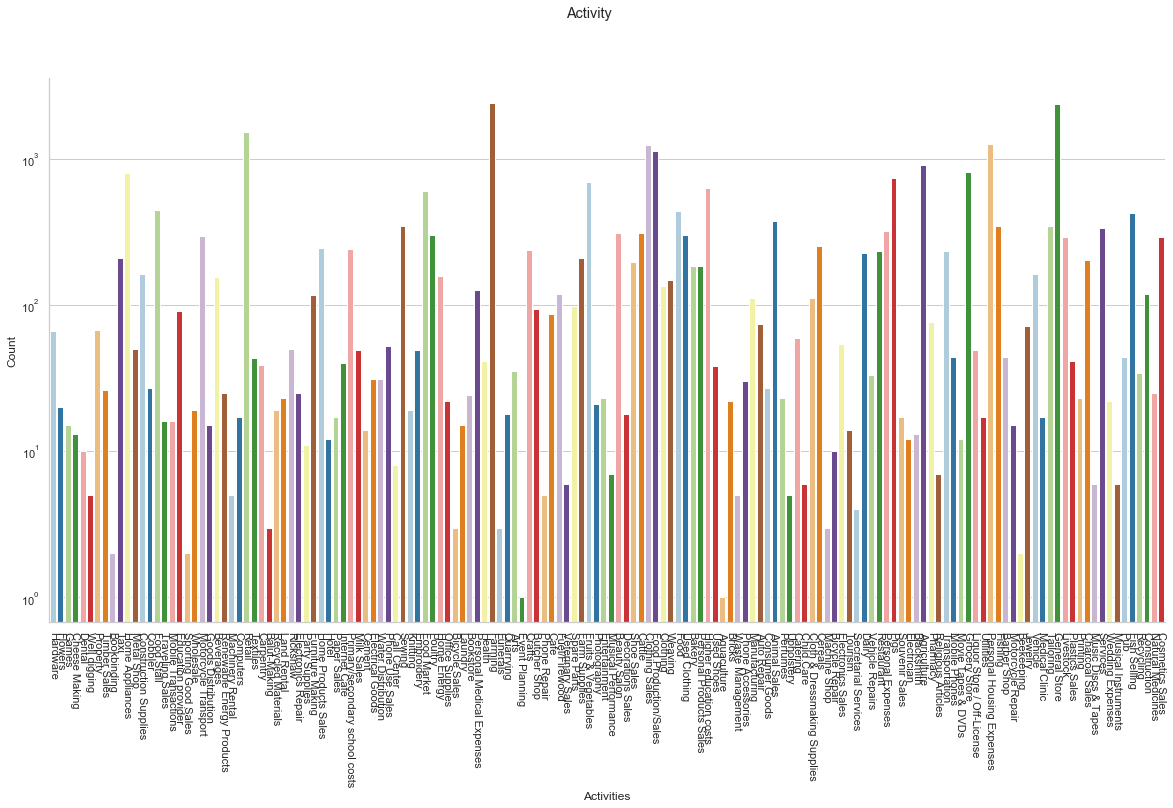

In [26]:
#print(dataset.activity.value_counts())
activity_labels = dataset.activity.values
activity_labels_unique = list(set(activity_labels))
fig = plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax=sns.countplot(x='activity',
                 palette="Paired",
                 data=dataset,
                 order=activity_labels_unique)
ax.set_xticklabels(activity_labels_unique, rotation=270) 
ax.set_ylabel("Count")
ax.set_xlabel("Activities")
suptitle("Activity")
ax.set_yscale("log")
despine()

 <br><br>
 - __Subset the original data with a frequency threshold ( > 350) and plot a bar graph.__

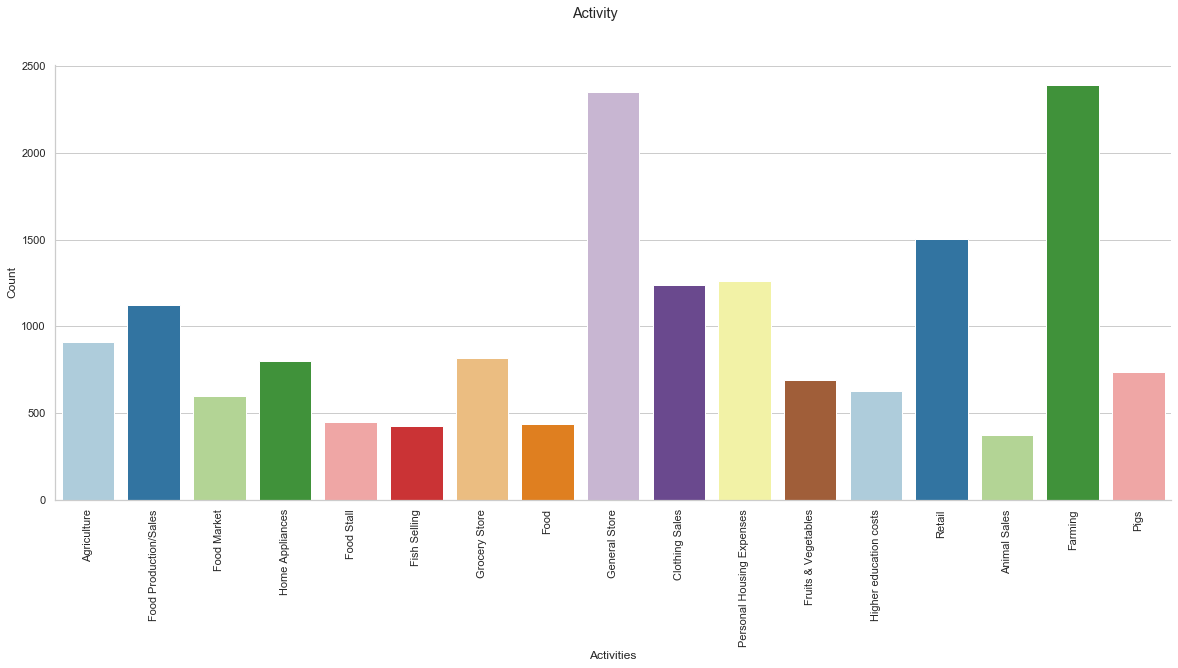

In [27]:
df = dataset
activity = dataset.activity.value_counts()
#print(activity[activity>350])
df = df[df['activity'].isin(activity[activity>350].index)]
activity_labels = df.activity.values
activity_labels_unique = list(set(activity_labels))
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20,8))
ax=sns.countplot(x=df.activity,palette="Paired", data=df,order=activity_labels_unique)
ax.set_xticklabels(activity_labels_unique,rotation=90) 
ax.set_ylabel("Count")
ax.set_xlabel("Activities")
suptitle("Activity")
#ax.set_yscale("log")
despine()

### 3.5 Lender Count

 - __Histogram__

Text(0, 0.5, 'Frequency')

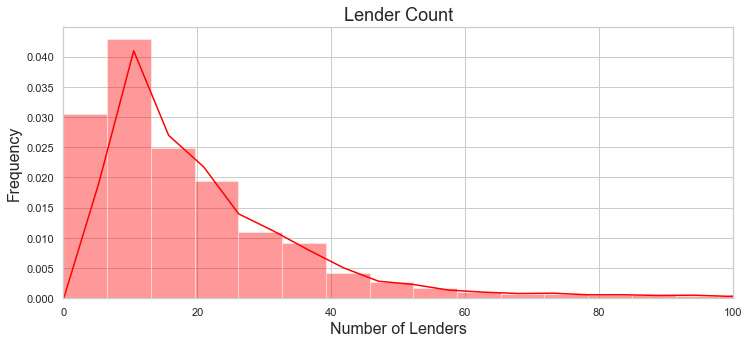

In [28]:
fig = plt.figure(figsize=(12,5))
ax = sns.distplot(dataset['lender_count'],bins=100,color='red')
plt.xlim(0,100)
plt.title('Lender Count',fontsize=18)
plt.xlabel('Number of Lenders',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

### 3.6 Loan Amount Data

 - __Histogram and Box Plot__

Text(0, 0.5, 'Frequency')

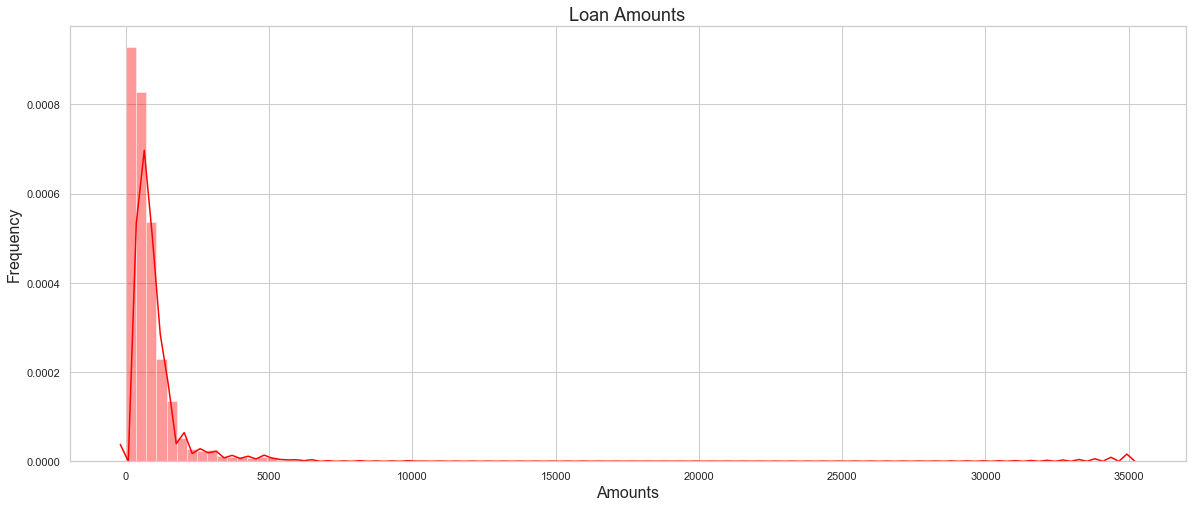

In [29]:
fig = plt.figure(figsize=(20,8))
ax = sns.distplot(dataset['loan_amount'],bins=100,color='red')
#plt.xlim(0,25000)
plt.title('Loan Amounts',fontsize=18)
plt.xlabel('Amounts',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

(0, 7000)

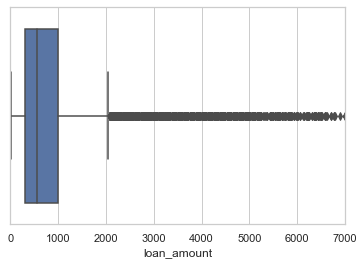

In [30]:
ax = sns.boxplot(x=dataset['loan_amount'])
plt.xlim(0,7000)

### 3.7 Sector

 - __Bar plot and Category plot__

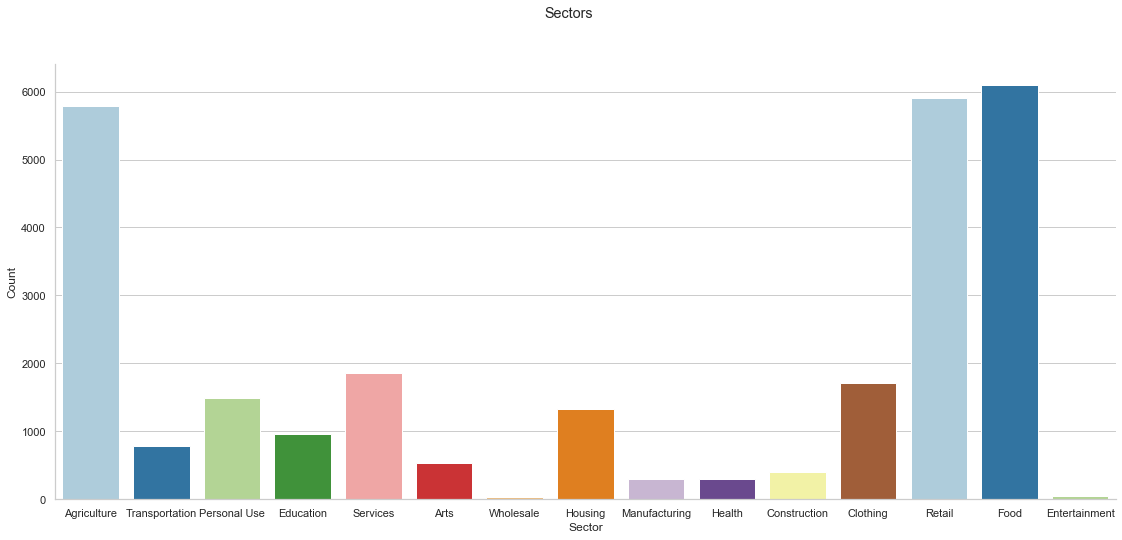

In [31]:
sector_labels = dataset.sector.values
sector_labels_unique = list(set(sector_labels))
fig = plt.figure(figsize=(19,8))
sns.set(style="whitegrid")
ax=sns.barplot(x=dataset.sector.value_counts().index,
               y=dataset.sector.value_counts(),
               palette="Paired", 
               data=dataset,
               order=sector_labels_unique)
ax.set_xticklabels(sector_labels_unique) 
ax.set_ylabel("Count")
ax.set_xlabel("Sector")
#ax.set_yscale("log")
suptitle("Sectors")
despine()

<Figure size 1800x720 with 0 Axes>

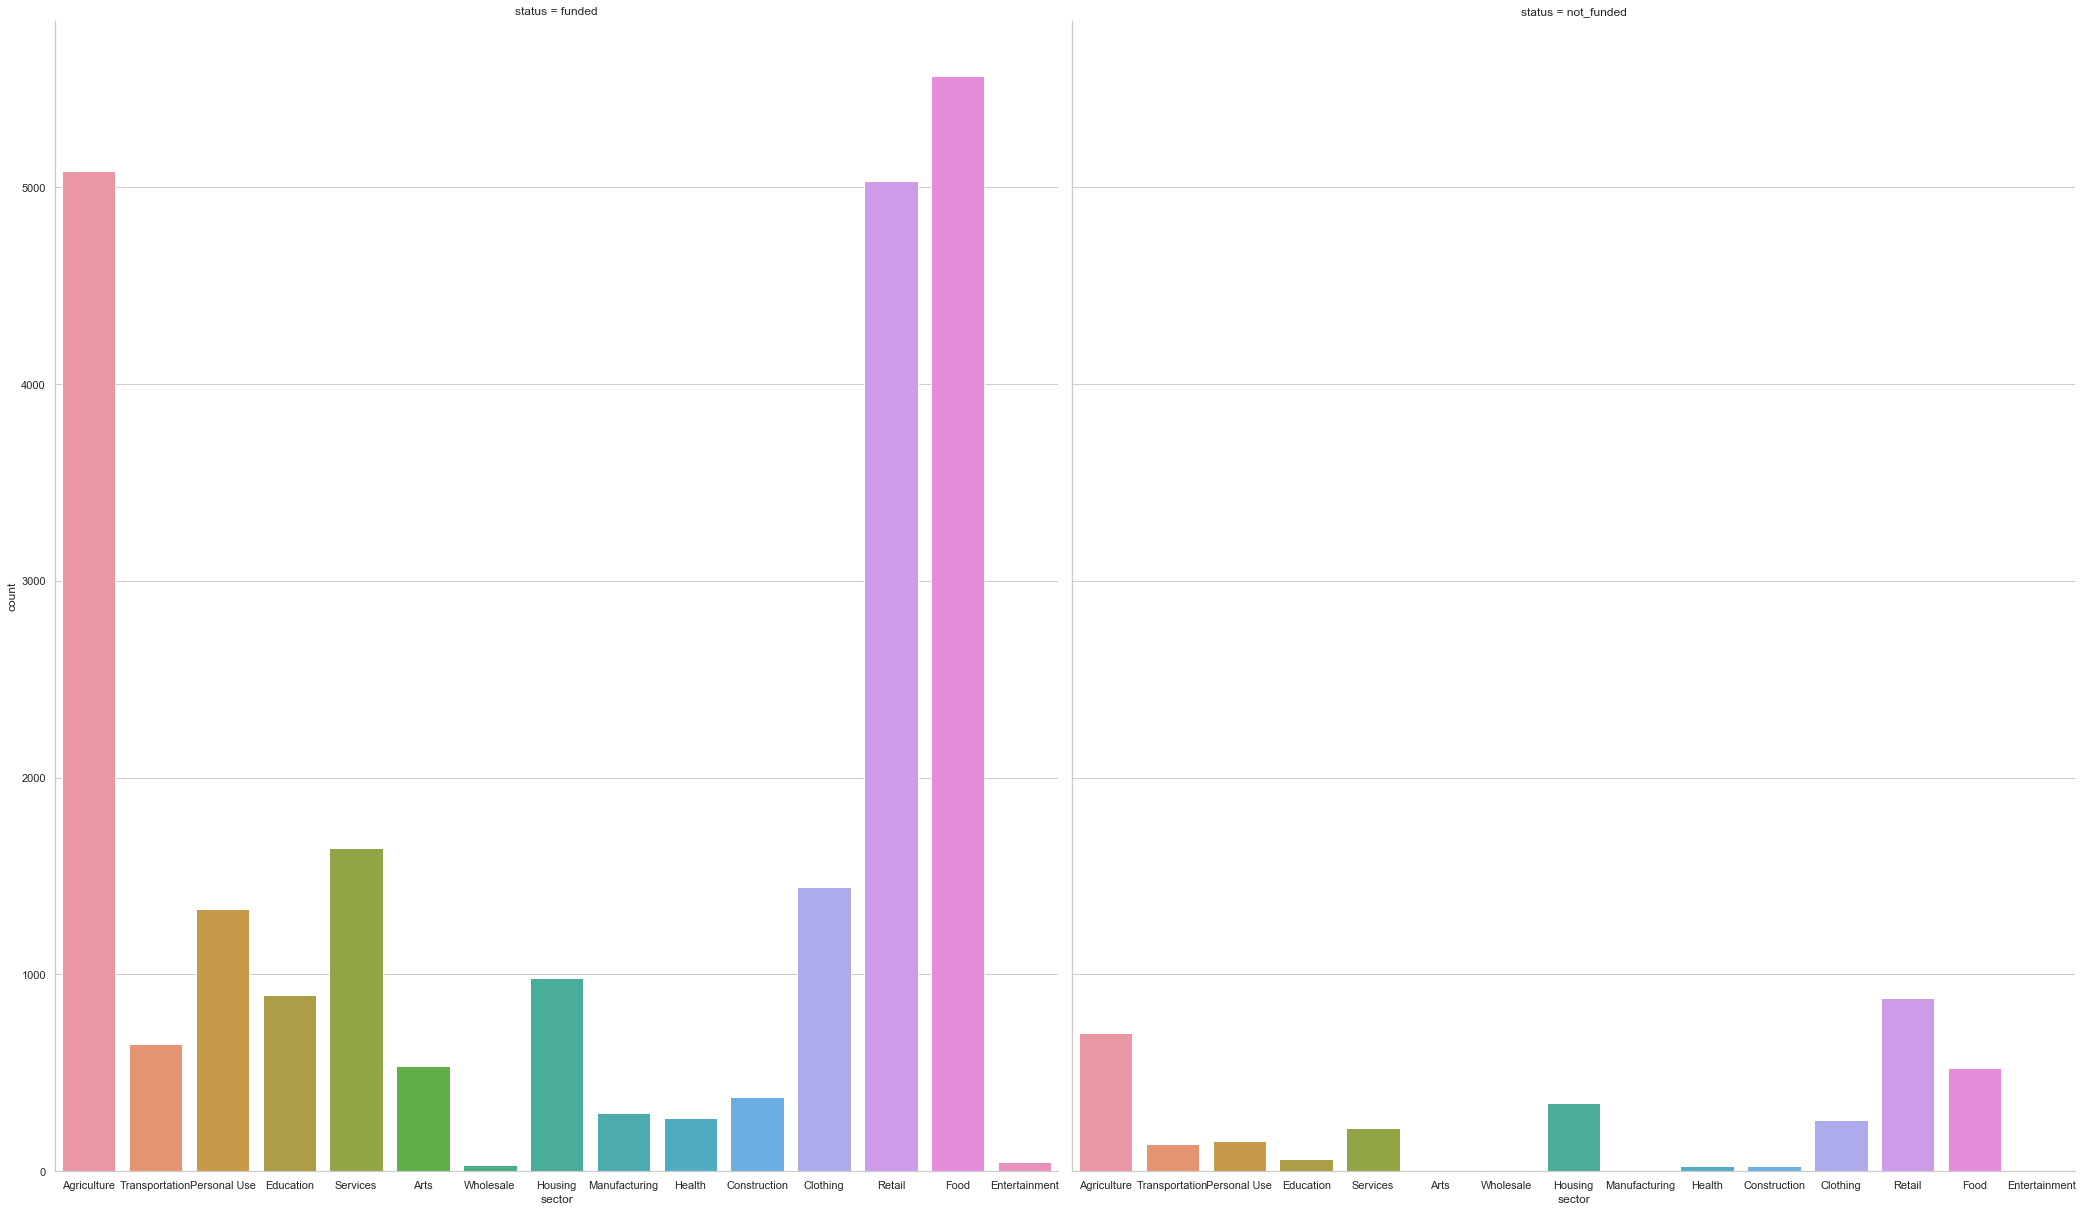

In [32]:
fig = plt.figure(figsize=(25,10))
g = sns.catplot(x="sector", col="status",
                data=dataset, kind="count",
                height=17, aspect=0.85,
                order=sector_labels_unique)
g.set_xticklabels(sector_labels_unique) 

### 3.8 Loan Term Data

 - __Histogram__

Text(0, 0.5, 'Frequency')

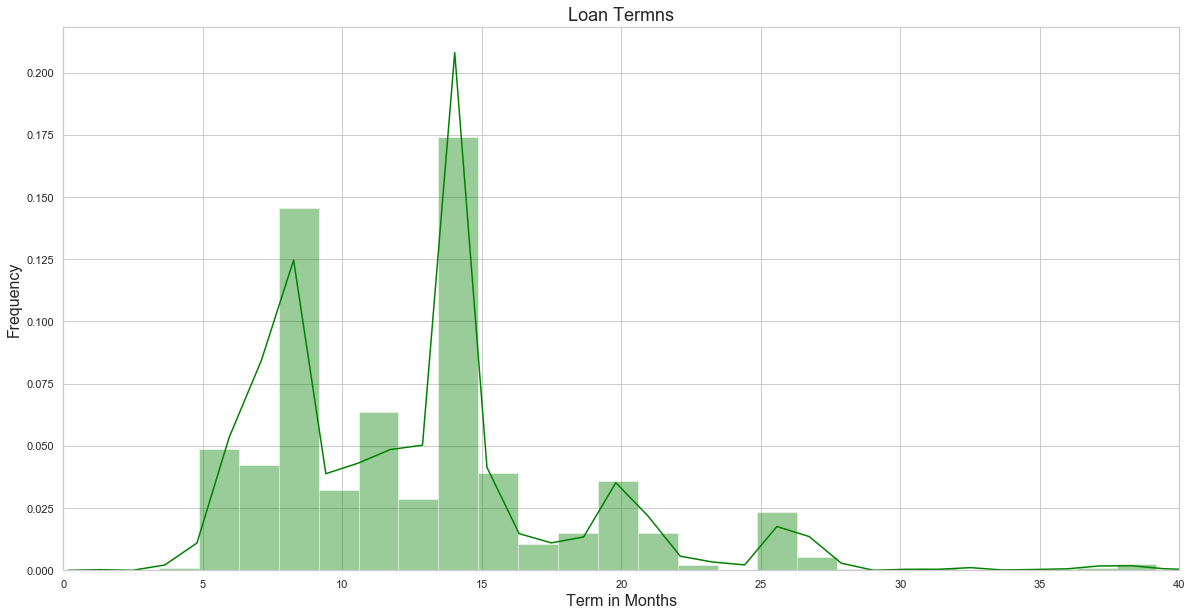

In [33]:
fig = plt.figure(figsize=(20,10))
ax = sns.distplot(dataset['term_in_months'],bins=100,color='green')
plt.xlim(0,40)
plt.title('Loan Termns',fontsize=18)
plt.xlabel('Term in Months',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

### 3.9 Repayment Interval Data

 - __Bar Plot and Category Plot__

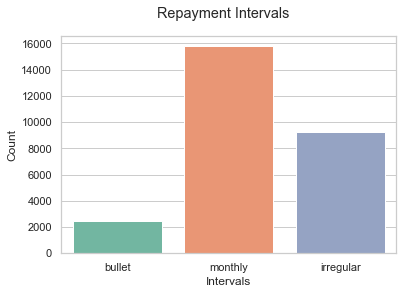

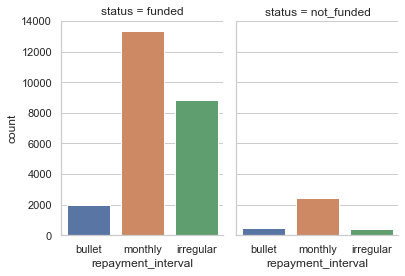

In [34]:
repayment_labels =dataset.repayment_interval.values
repayment_labels_unique = list(set(repayment_labels))
sns.set(style="whitegrid")
ax=sns.countplot(x='repayment_interval',
                 palette="Set2", 
                 data=dataset,
                 order=repayment_labels_unique)
ax.set_xticklabels(repayment_labels_unique) 
ax.set_ylabel("Count")
ax.set_xlabel("Intervals")
suptitle("Repayment Intervals")
g = sns.catplot(x="repayment_interval", col="status",
                data=dataset, kind="count",
                height=4, aspect=.7,
                order=repayment_labels_unique)
g.set_xticklabels(repayment_labels_unique) 
despine()

## 4. Handling Categorical Data
<a id='category'></a>

 
 - The column __'currency_policy'__ has only two categories : __'shared'__ and __'not_shared'__ i.e. the column is __binary__. Encode one value to __0__ and the other to __1__.
 - __'Status'__ is our __output__/__ variable which has __2__ classes : __'funded'__ and __'not_funded'__, which makes it a case of __binary classification__. Encode one class to __1__ and the other to __0__.     

In [35]:

dataset['currency_policy'] = dataset['currency_policy'].replace({'shared':1,'not shared':0})

dataset['status'] = dataset['status'].replace({'funded':1,'not_funded':0})

 - The column __'repayment_interval'__ has __3__ Nominal categories. 
 - We encode it by creating a column for each category and mark each cateogry __1__ and other categories __0__  if that category is __present__.
 - Similar for __gender__, __activity__, __country__, __original_language__ and __sector__ attribute.

In [37]:
category_replace = ['activity','country','original_language','sector','repayment_interval','borrower_genders']
for i in category_replace:
    dummies = pd.get_dummies(dataset[i],drop_first=True)
    dummies = dummies.add_prefix("{}#".format(i))
    dataset.drop(i,axis=1,inplace=True)
    dataset = dataset.join(dummies)
#dataset.drop('repayment_interval#bullet',axis=1,inplace=True)

In [38]:
dataset

,currency_policy,lender_count,loan_amount,status,term_in_months,rMPI,activity#Animal Sales,activity#Aquaculture,activity#Arts,activity#Auto Repair,...,sector#Manufacturing,sector#Personal Use,sector#Retail,sector#Services,sector#Transportation,sector#Wholesale,repayment_interval#irregular,repayment_interval#monthly,borrower_genders#group,borrower_genders#male
0,1,5.0,125.0,1,8.0,0.097,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,5.0,125.0,1,14.0,0.055,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,10.0,375.0,1,8.0,0.000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,27.0,850.0,1,14.0,0.021,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,17.0,550.0,1,9.0,0.417,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27531,1,85.0,2300.0,1,9.0,0.158,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27532,0,17.0,475.0,1,8.0,0.422,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27533,1,38.0,1075.0,1,11.0,0.055,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
27534,1,35.0,1075.0,1,6.0,0.122,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 5. Saving Preprocessed Data
<a id='pre'></a>

In [ ]:
dataset.to_csv('lendingdata_preprocessed.csv')